In [1]:
import cv2,os

data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [2]:
data_path=r'C:\Users\lenovo\Sign-To-Speech-Conversion\dataset\train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [3]:
data_path='dataset'

In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [6]:
!pip install tensorflow==2.10.1 numpy==1.23.5



Defaulting to user installation because normal site-packages is not writeable


In [7]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

dataset\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
dataset\test\0
dataset\test\A
dataset\test\B
dataset\test\C
dataset\test\D
dataset\test\E
dataset\test\F
dataset\test\G
dataset\test\H
dataset\test\I
dataset\test\J
dataset\test\K
dataset\test\L
dataset\test\M
dataset\test\N
dataset\test\O
dataset\test\P
dataset\test\Q
dataset\test\R
dataset\test\S
dataset\test\T
dataset\test\U
dataset\test\V
dataset\test\W
dataset\test\X
dataset\test\Y
dataset\test\Z
dataset\train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
dataset\train\0
dataset\train\A
dataset\train\B
dataset\train\C
dataset\train\D
dataset\train\E
dataset\train\F
dataset\train\G
dataset\train\H
dataset\train\I
dataset\train\J
dataset\train\K
dataset\train\L
dataset\train\M
dataset\train\N
dataset\train\O
dataset\train\P
dataset\train\Q
dataset\

In [9]:
pip install tensorflow==2.10.1 numpy==1.23.5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
datanp=np.array(data)

In [19]:

datanp.shape

(17113, 128, 128)

In [20]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [22]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [23]:
new_target.shape

(17113, 27)

In [24]:
np.save('data_img',data)
np.save('target',new_target)

In [25]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [26]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [32]:
pip install tensorflow==2.10.1


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached tensorflow-2.10.1-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached tensorflow-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print(tf.__version__)  # Should print TensorFlow version


2.10.1


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [35]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

In [36]:
from keras.callbacks import ModelCheckpoint

In [37]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 1.9864 - accuracy: 0.4012

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


300/300 [==============================] - 118s 389ms/step - loss: 1.9864 - accuracy: 0.4012 - val_loss: 0.4028 - val_accuracy: 0.9160
Epoch 2/20
300/300 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.7819

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


300/300 [==============================] - 96s 319ms/step - loss: 0.6576 - accuracy: 0.7819 - val_loss: 0.0944 - val_accuracy: 0.9832
Epoch 3/20
300/300 [==============================] - ETA: 0s - loss: 0.4049 - accuracy: 0.8627

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


300/300 [==============================] - 104s 346ms/step - loss: 0.4049 - accuracy: 0.8627 - val_loss: 0.0314 - val_accuracy: 0.9944
Epoch 4/20
300/300 [==============================] - ETA: 0s - loss: 0.2951 - accuracy: 0.9004

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


300/300 [==============================] - 95s 318ms/step - loss: 0.2951 - accuracy: 0.9004 - val_loss: 0.0216 - val_accuracy: 0.9971
Epoch 5/20
300/300 [==============================] - ETA: 0s - loss: 0.2326 - accuracy: 0.9226

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


300/300 [==============================] - 90s 302ms/step - loss: 0.2326 - accuracy: 0.9226 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 6/20
300/300 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.9326

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


300/300 [==============================] - 86s 288ms/step - loss: 0.2044 - accuracy: 0.9326 - val_loss: 0.0070 - val_accuracy: 0.9990
Epoch 7/20
300/300 [==============================] - ETA: 0s - loss: 0.1795 - accuracy: 0.9408

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


300/300 [==============================] - 85s 284ms/step - loss: 0.1795 - accuracy: 0.9408 - val_loss: 0.0066 - val_accuracy: 0.9976
Epoch 8/20
300/300 [==============================] - ETA: 0s - loss: 0.1589 - accuracy: 0.9469

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


300/300 [==============================] - 86s 286ms/step - loss: 0.1589 - accuracy: 0.9469 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 9/20
300/300 [==============================] - 91s 305ms/step - loss: 0.1528 - accuracy: 0.9461 - val_loss: 0.0066 - val_accuracy: 0.9985
Epoch 10/20
300/300 [==============================] - 94s 315ms/step - loss: 0.1381 - accuracy: 0.9546 - val_loss: 0.0056 - val_accuracy: 0.9990
Epoch 11/20
300/300 [==============================] - ETA: 0s - loss: 0.1250 - accuracy: 0.9593

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


300/300 [==============================] - 102s 342ms/step - loss: 0.1250 - accuracy: 0.9593 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 12/20
300/300 [==============================] - 102s 341ms/step - loss: 0.1218 - accuracy: 0.9630 - val_loss: 0.0044 - val_accuracy: 0.9998
Epoch 13/20
300/300 [==============================] - 108s 360ms/step - loss: 0.1237 - accuracy: 0.9598 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 14/20
300/300 [==============================] - ETA: 0s - loss: 0.1070 - accuracy: 0.9655

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


300/300 [==============================] - 111s 369ms/step - loss: 0.1070 - accuracy: 0.9655 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 15/20
300/300 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9657

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


300/300 [==============================] - 112s 373ms/step - loss: 0.1048 - accuracy: 0.9657 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 16/20
300/300 [==============================] - 108s 359ms/step - loss: 0.0881 - accuracy: 0.9707 - val_loss: 0.0016 - val_accuracy: 0.9998
Epoch 17/20
300/300 [==============================] - 109s 364ms/step - loss: 0.1009 - accuracy: 0.9683 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 18/20
300/300 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9674

INFO:tensorflow:Assets written to: model-018.model\assets


INFO:tensorflow:Assets written to: model-018.model\assets


300/300 [==============================] - 114s 379ms/step - loss: 0.0945 - accuracy: 0.9674 - val_loss: 9.8792e-04 - val_accuracy: 0.9998
Epoch 19/20
300/300 [==============================] - 114s 380ms/step - loss: 0.0804 - accuracy: 0.9762 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 20/20
300/300 [==============================] - 115s 384ms/step - loss: 0.0823 - accuracy: 0.9761 - val_loss: 0.0013 - val_accuracy: 0.9995


In [38]:
print(classifier.evaluate(test_data,test_target))

107/107 [==============================] - 9s 80ms/step - loss: 0.0036 - accuracy: 0.9985
[0.003595033660531044, 0.9985392689704895]


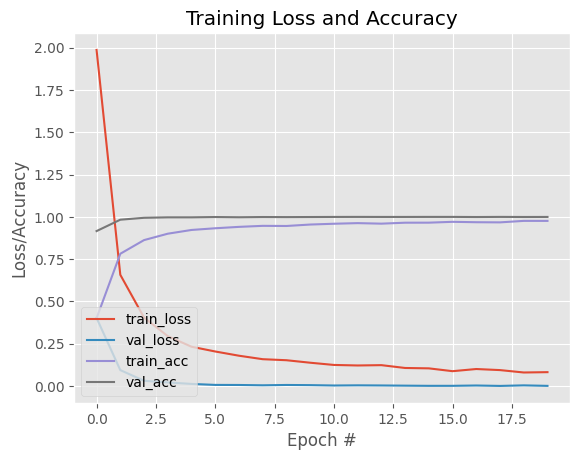

In [40]:
import matplotlib.pyplot as plt
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [41]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('asl_classifier.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


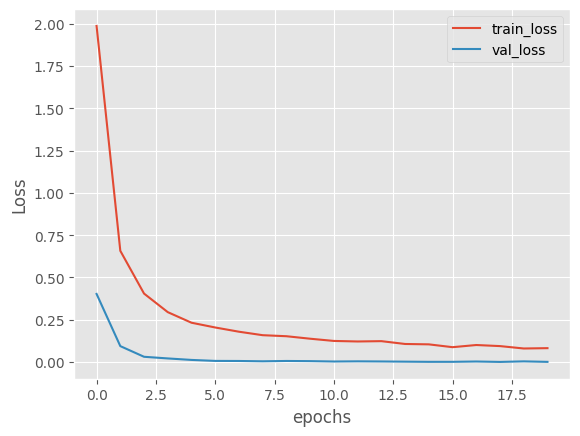

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

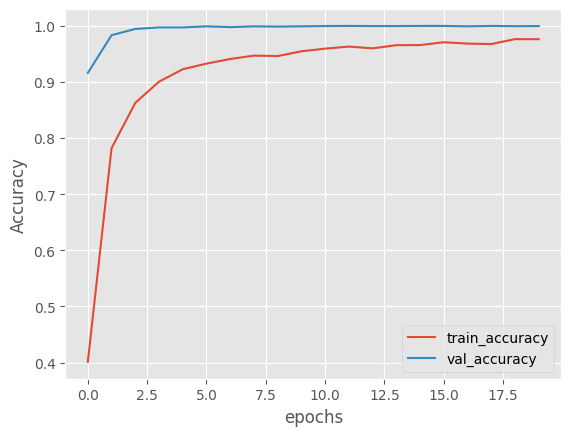

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()